In [5]:
# Séries Temporais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

ARQ = '../data/raw/AirPassengers.csv'

df = pd.read_csv(ARQ)
df.shape

(144, 2)

In [6]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
print(df.dtypes)

Month          object
#Passengers     int64
dtype: object


In [8]:
df = pd.read_csv(ARQ, 
                 parse_dates=['Month'], 
                 index_col='Month', 
                 date_format='%Y-%m') # Jeito novo

print(f'\n{df.dtypes}')


#Passengers    int64
dtype: object


In [9]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [10]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [11]:
ts = df['#Passengers']
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [12]:
# Visualização por registro específico
ts.iloc[1]

np.int64(118)

In [13]:
# Visualização por ano e mês
ts['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [14]:
# Visualização por data
ts[datetime(1949,2,1)]

np.int64(118)

In [15]:
# Visualização por intervalos
ts['1950-01-01':'1950-07-31']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [16]:
ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [17]:
ts.index.max()

Timestamp('1960-12-01 00:00:00')

In [18]:
ts.index.min()

Timestamp('1949-01-01 00:00:00')

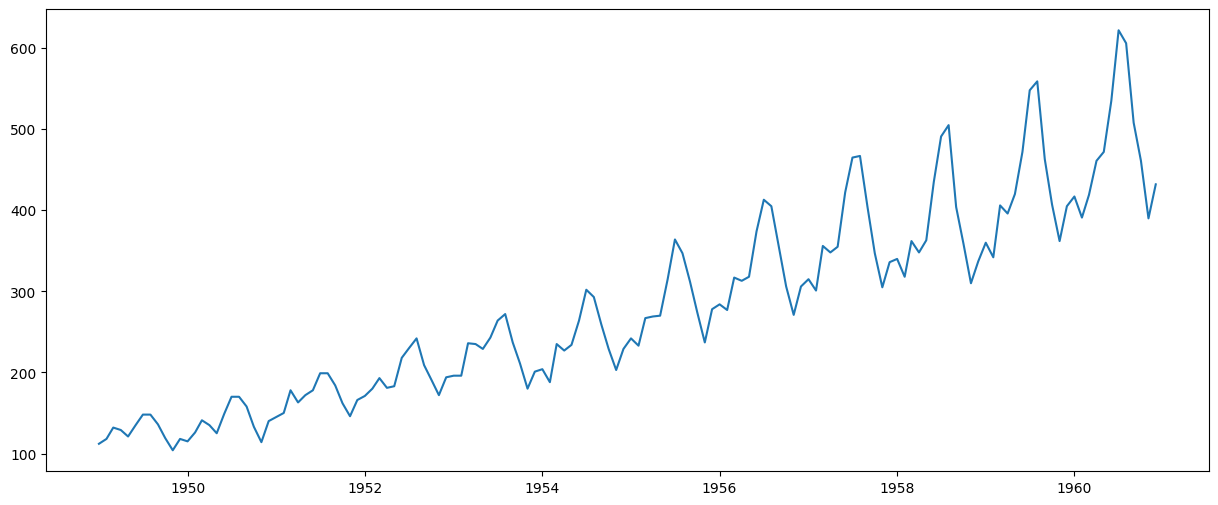

In [19]:
# Visualização da série temporal completa
plt.plot(ts)

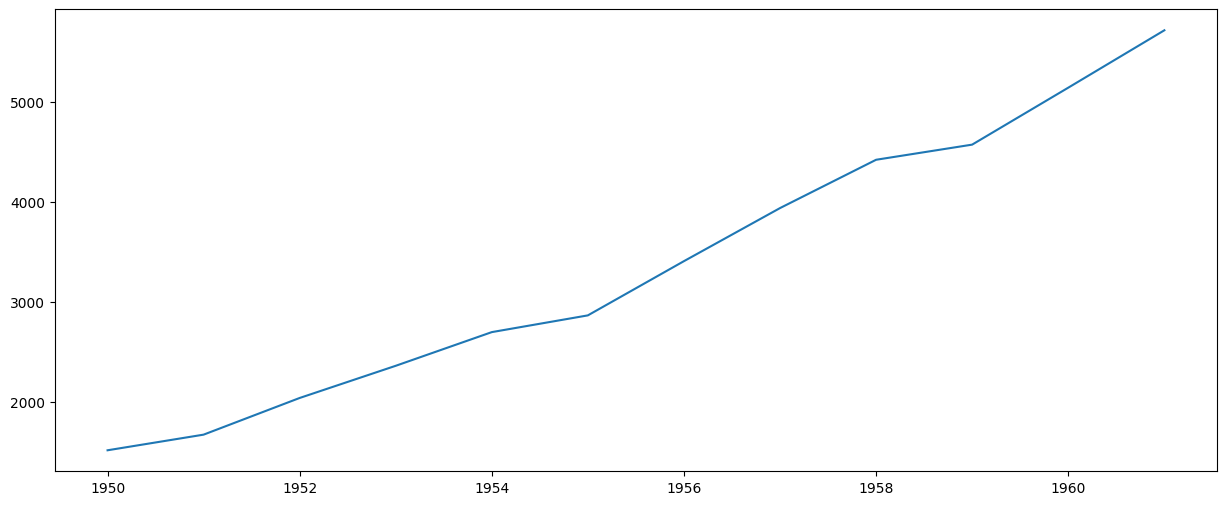

In [20]:
# Visualização por ano
ts_ano = ts.resample('YE').sum() # Future warning sobre 'A', pediu para subistituir por 'YE'
plt.plot(ts_ano)

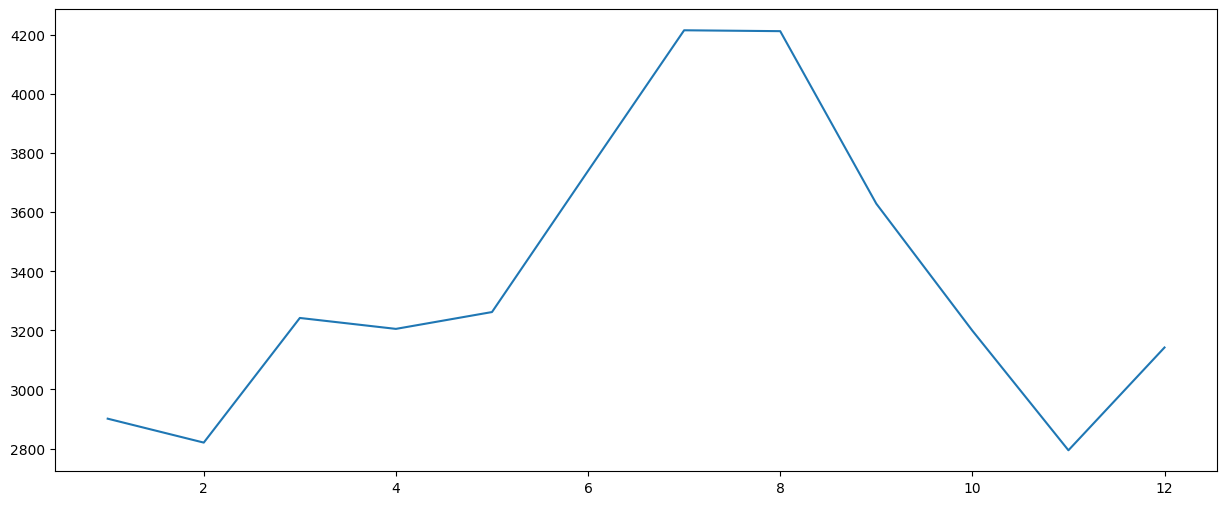

In [21]:
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes)

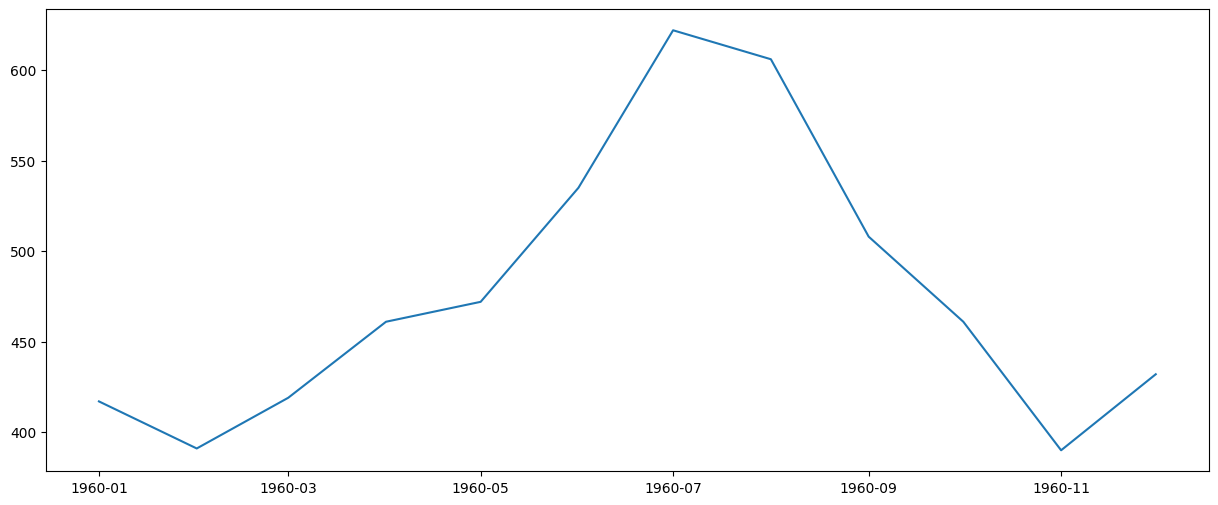

In [22]:
ts_datas = ts['1960-01-01':'1960-12-01']
plt.plot(ts_datas)

In [23]:
# Decomposição de Séries Temporais
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

# Mesma base

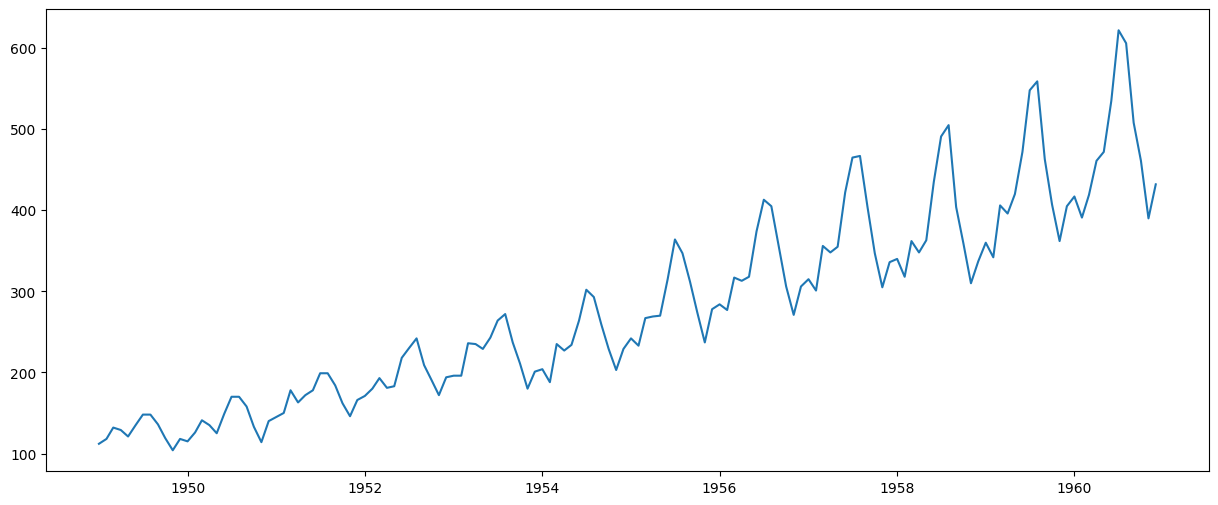

In [24]:
plt.plot(ts)

In [25]:
# Decomposição da série temporal, criando uma variável para cada formato
decompose = seasonal_decompose(ts)

In [31]:
trend = decompose.trend
trend

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [26]:
seasonal = decompose.seasonal
seasonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [27]:
resid = decompose.resid
resid

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

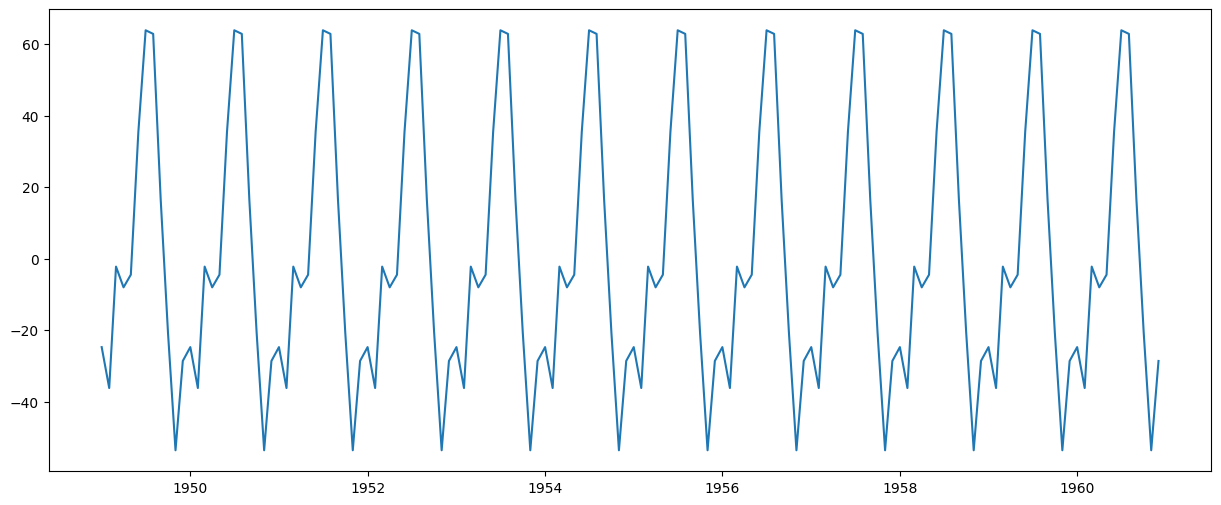

In [28]:
# Visualização para cada formato da série temporal
plt.plot(seasonal)

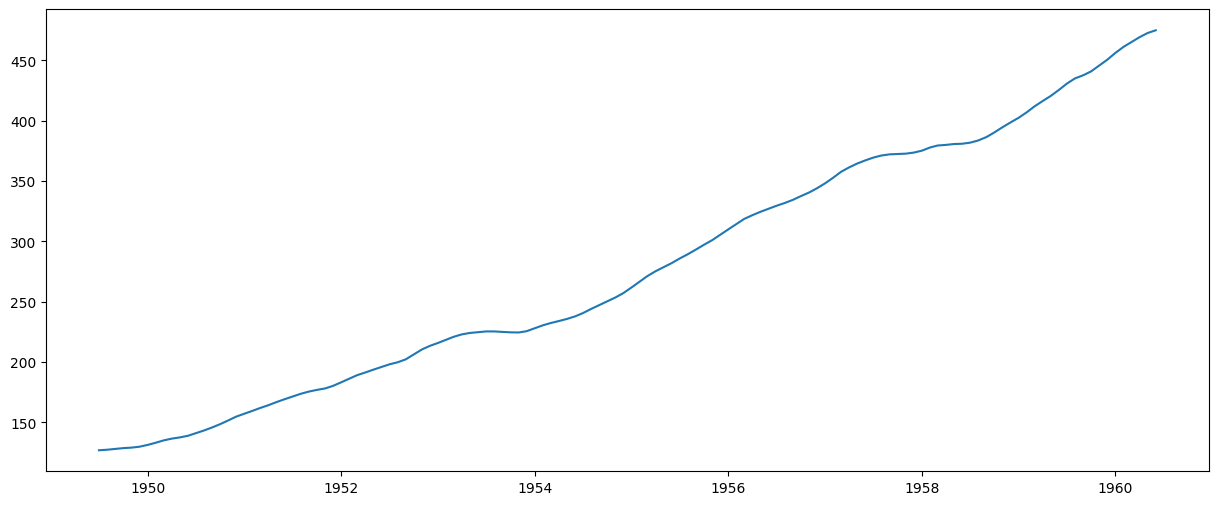

In [32]:
plt.plot(trend)

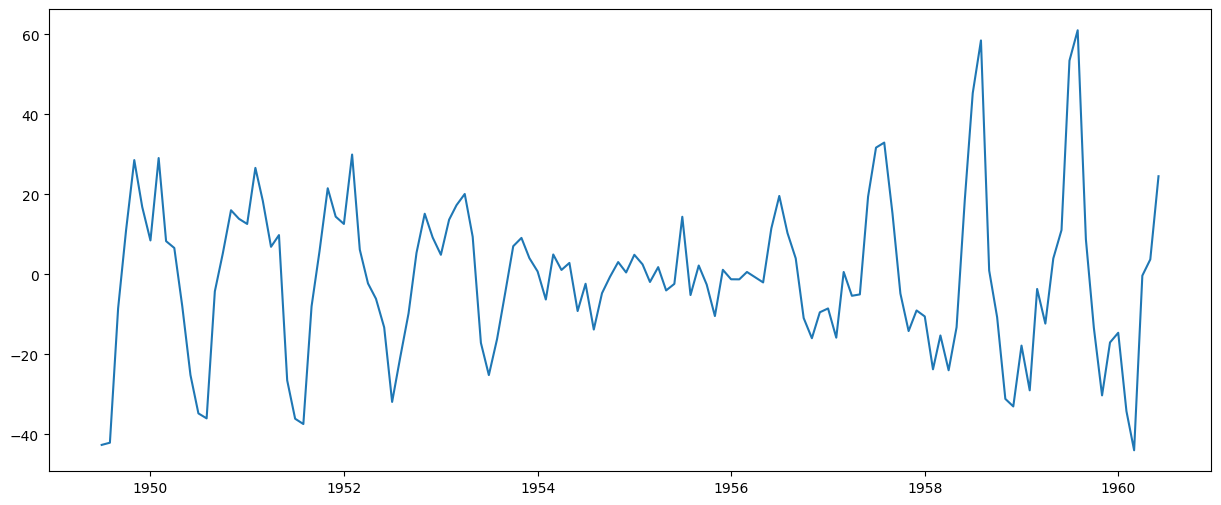

In [33]:
plt.plot(resid)

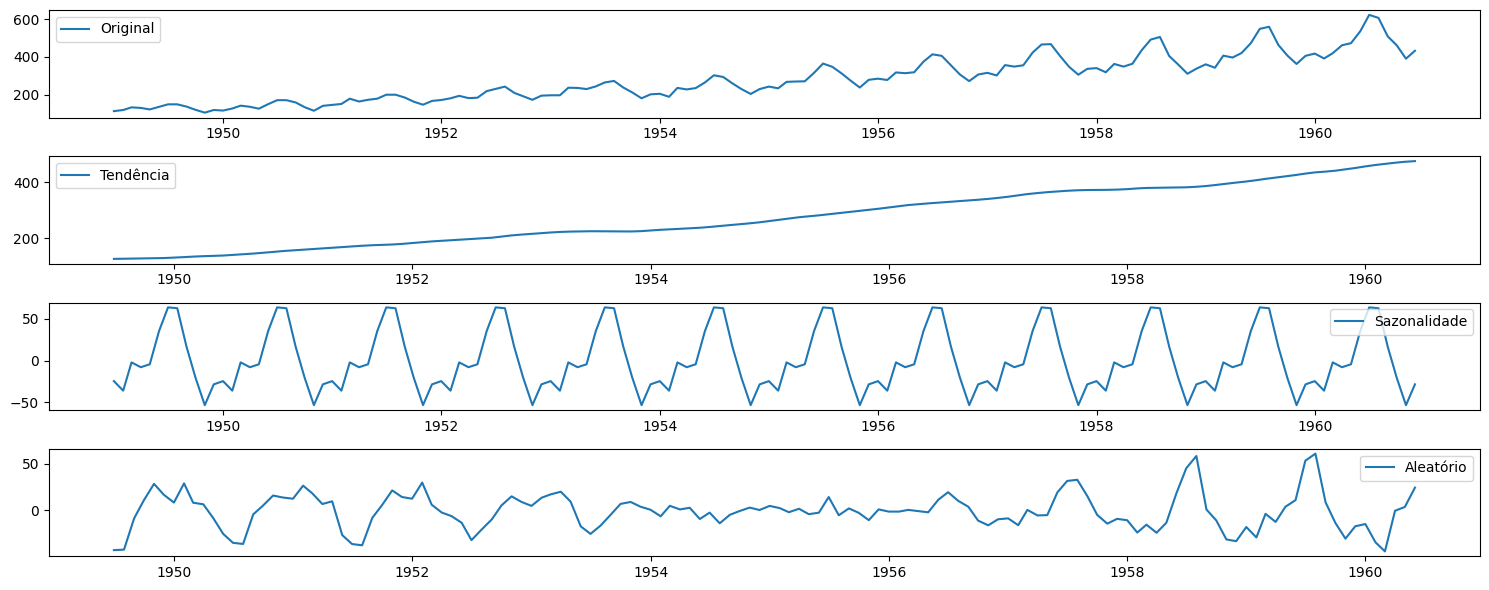

In [34]:
plt.subplot(4, 1, 1)
plt.plot(ts, label = 'Original')
plt.legend(loc = 'best')

# Trend
plt.subplot(4, 1, 2)
plt.plot(trend, label = 'Tendência')
plt.legend(loc = 'best')

# Seasonal
plt.subplot(4, 1, 3)
plt.plot(seasonal, label = 'Sazonalidade')
plt.legend(loc = 'best')

# Resid
plt.subplot(4, 1, 4)
plt.plot(resid, label = 'Aleatório')
plt.legend(loc = 'best')
plt.tight_layout()

In [35]:
# Previsão de Séris Temporais (ARIMA)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime
from pmdarima.arima import auto_arima

# Mesma base

In [36]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


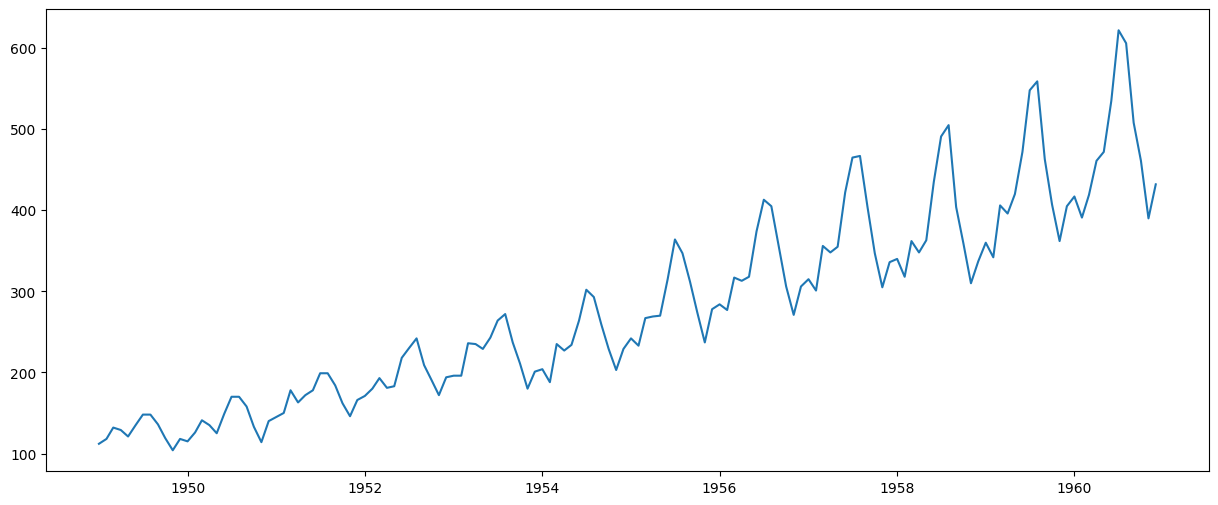

In [37]:
plt.plot(df)

In [41]:
stepwise_model = auto_arima(df, start_p=1, start_q=1, start_d=0, start_P=0, max_p=6, m=12, seasonal=True, trace=True, stepwise=False, suppress_warnings=True)

c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\depre

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.01 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=0.06 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.276, Time=0.13 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.11 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1034.096, Time=0.26 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.09 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.74 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=0.94 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.02 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.08 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1019.494, Time=0.22 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.06 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=0.22 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1012.991, Time=0.66 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.14 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=0.69 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,1,2)[12]             : AIC=inf, Time=1.15 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=1022.627, Time=0.04 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1023.001, Time=0.11 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,1,2)[12]             : AIC=1021.453, Time=0.24 sec
 ARIMA(0,1,2)(1,1,0)[12]             : AIC=1022.424, Time=0.08 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,1,1)[12]             : AIC=1022.325, Time=0.26 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,1,2)[12]             : AIC=1014.990, Time=0.73 sec
 ARIMA(0,1,2)(2,1,0)[12]             : AIC=1021.148, Time=0.16 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,1,1)[12]             : AIC=inf, Time=0.97 sec
 ARIMA(0,1,3)(0,1,0)[12]             : AIC=1020.204, Time=0.05 sec
 ARIMA(0,1,3)(0,1,1)[12]             : AIC=1020.805, Time=0.14 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,1,2)[12]             : AIC=1020.159, Time=0.35 sec
 ARIMA(0,1,3)(1,1,0)[12]             : AIC=1020.361, Time=0.10 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(1,1,1)[12]             : AIC=1020.618, Time=0.27 sec
 ARIMA(0,1,3)(2,1,0)[12]             : AIC=1019.745, Time=0.19 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,4)(0,1,0)[12]             : AIC=1020.696, Time=0.06 sec
 ARIMA(0,1,4)(0,1,1)[12]             : AIC=1020.176, Time=0.19 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,4)(1,1,0)[12]             : AIC=1019.607, Time=0.14 sec
 ARIMA(0,1,5)(0,1,0)[12]             : AIC=1021.399, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.02 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1020.914, Time=0.08 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\depre

 ARIMA(1,1,0)(0,1,2)[12]             : AIC=1019.493, Time=0.19 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.06 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.17 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,1,2)[12]             : AIC=1014.742, Time=0.62 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.13 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=0.87 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(2,1,2)[12]             : AIC=inf, Time=1.04 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.14 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.13 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1021.313, Time=0.33 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1022.356, Time=0.08 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1022.299, Time=0.28 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,1,2)[12]             : AIC=1014.990, Time=0.82 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.24 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,1,1)[12]             : AIC=inf, Time=1.19 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.06 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1024.718, Time=0.20 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,1,2)[12]             : AIC=1023.125, Time=0.47 sec
 ARIMA(1,1,2)(1,1,0)[12]             : AIC=1024.191, Time=0.15 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,1,1)[12]             : AIC=1024.121, Time=0.34 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,1,0)[12]             : AIC=1022.805, Time=0.31 sec
 ARIMA(1,1,3)(0,1,0)[12]             : AIC=1019.252, Time=0.19 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,1,1)[12]             : AIC=1019.532, Time=0.38 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(1,1,0)[12]             : AIC=1019.133, Time=0.32 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,4)(0,1,0)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.04 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=1022.905, Time=0.09 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,1,2)[12]             : AIC=1021.381, Time=0.23 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=1022.373, Time=0.08 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,1,1)[12]             : AIC=1022.390, Time=0.26 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(1,1,2)[12]             : AIC=1015.534, Time=0.78 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.18 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=1.01 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.10 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.27 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,1,2)[12]             : AIC=1017.950, Time=0.56 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.29 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=0.57 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(2,1,0)[12]             : AIC=1017.658, Time=0.60 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.11 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.33 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.33 sec
 ARIMA(2,1,3)(0,1,0)[12]             : AIC=1019.796, Time=0.20 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,1,0)[12]             : AIC=1023.666, Time=0.04 sec
 ARIMA(3,1,0)(0,1,1)[12]             : AIC=1024.441, Time=0.12 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(0,1,2)[12]             : AIC=1023.149, Time=0.31 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=1024.003, Time=0.11 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,0)(1,1,1)[12]             : AIC=1024.141, Time=0.33 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=1022.819, Time=0.19 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,1,0)[12]             : AIC=1019.084, Time=0.11 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,1,1)[12]             : AIC=1019.696, Time=0.33 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(1,1,0)[12]             : AIC=1019.327, Time=0.28 sec
 ARIMA(3,1,2)(0,1,0)[12]             : AIC=1021.083, Time=0.19 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(0,1,0)[12]             : AIC=1021.975, Time=0.05 sec
 ARIMA(4,1,0)(0,1,1)[12]             : AIC=1022.158, Time=0.13 sec


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,0)(1,1,0)[12]             : AIC=1021.530, Time=0.14 sec
 ARIMA(4,1,1)(0,1,0)[12]             : AIC=1023.947, Time=0.10 sec
 ARIMA(5,1,0)(0,1,0)[12]             : AIC=1023.944, Time=0.06 sec

Best model:  ARIMA(0,1,1)(1,1,2)[12]          
Total fit time: 27.485 seconds


c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [42]:
# 1019.1780567487574
print(stepwise_model.aic())

1012.9907965688227


In [47]:
train = df.loc['1949-01-01':'1959-12-01']
test = df.loc['1960-01-01':]

In [48]:
stepwise_model.fit(train)

c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,order,"(0, ...)"
,seasonal_order,"(1, ...)"
,start_params,None
,method,'lbfgs'
,maxiter,50
,suppress_warnings,True
,out_of_sample_size,0
,scoring,'mse'
,scoring_args,{}
,trend,None
,with_intercept,False


In [49]:
future_forecast = stepwise_model.predict(n_periods=12)

c:\Users\pedro\OneDrive\Documentos\Cursos\Curso Ciência de Dados\Formação CD\7.Prática em Python\praticas\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [50]:
future_forecast

1960-01-01    420.236854
1960-02-01    398.453336
1960-03-01    461.904915
1960-04-01    450.684733
1960-05-01    474.003168
1960-06-01    537.915916
1960-07-01    612.238402
1960-08-01    623.597656
1960-09-01    520.166813
1960-10-01    462.316906
1960-11-01    412.929121
1960-12-01    453.749162
Freq: MS, dtype: float64

In [51]:
future_forecast = pd.DataFrame(future_forecast, index = test.index, columns = ['#Passengers'])

<Axes: xlabel='Month'>

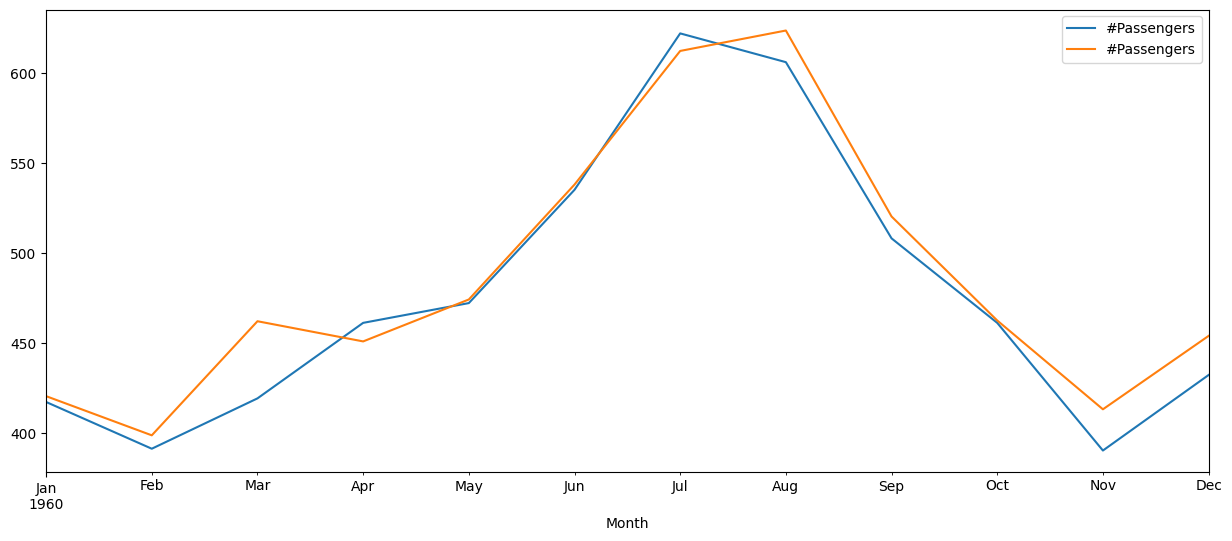

In [53]:
pd.concat([test, future_forecast], axis=1).plot()

<Axes: xlabel='Month'>

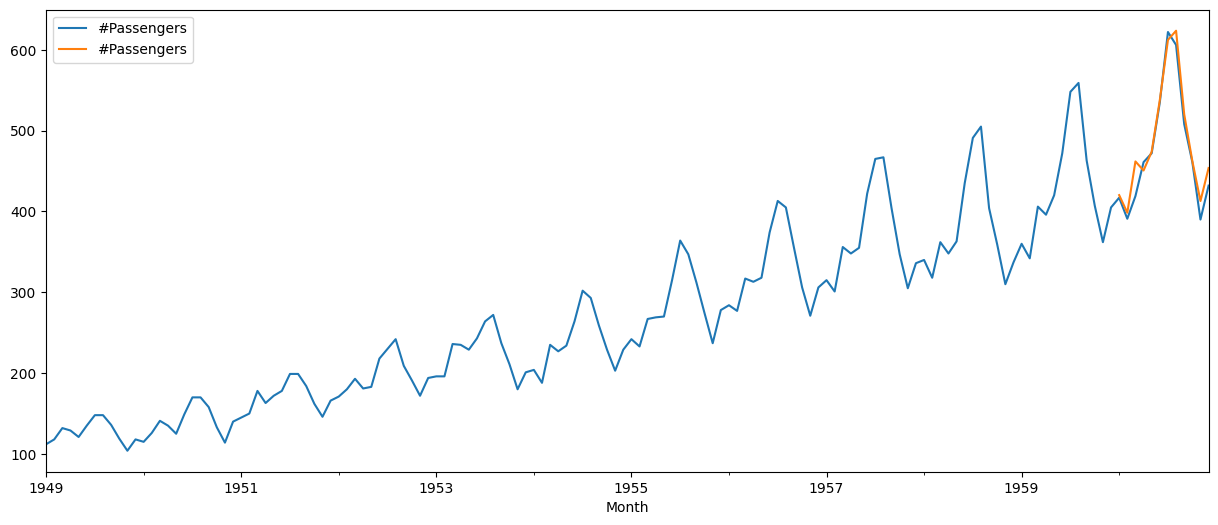

In [54]:
pd.concat([df, future_forecast], axis=1).plot()